In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Project:** Data Minining Project for  X company

The CRISP-DM Framework


The CRISP-DM methodology provides a structured approach to planning a data mining project. It is a robust and well-proven methodology.
* Business understanding (BU): Determine Business Objectives, Assess Situation, Determine Data Mining Goals, Produce Project Plan

* Data understanding (DU): Collect Initial Data, Describe Data, Explore Data, Verify Data Quality

* Data preparation (DP): Select Data, Clean Data, Construct Data, Integrate Data

* Modeling (M): Select modeling technique, Generate Test Design, Build Model, Assess Model
*  Evaluation (E): Evaluate Results, Review Process, Determine Next Steps
*  Deployment (D): Plan Deployment, Plan Monitoring and Maintenance, Produce Final Report, Review Project


References:

[What is the CRISP-DM methodology?](https://www.sv-europe.com/crisp-dm-methodology/)

[Introduction to CRISP DM Framework for Data Science and Machine Learning](https://www.linkedin.com/pulse/chapter-1-introduction-crisp-dm-framework-data-science-anshul-roy/)

**Data Set**
### The data is for company X which is trying to control attrition. 
### There are two sets of data: "Existing employees" and "Employees who have left". The following attributes are available for every employee.


*   Satisfaction Level

*   Last evaluation

*   Number of projects

*   Average monthly hours

*   Time spent at the company
*   Whether they have had a work accident


*  Whether they have had a promotion in the last 5 years


*   Departments (column sales)


*   Salary


*  Whether the employee has left


















**Your Role**
 

*   As data science team member X company asked you to answer this two questions.
*  What type of employees is leaving? 

*   Determine which employees are prone to leave next.






Business Understanding

---

This step mostly focuses on understanding the Business in all the different aspects. It follows the below different steps.




* Identify the goal and frame the business problem.
* Prepare Analytical Goal i.e. what type of performance metric and loss function to use
* Gather information on resource, constraints, assumptions, risks etc
*   Prepare Work Flow Chart

### Write the main objectives of this project in your words?
minimum of 100 characters

In [2]:
main_objectives='''The main objective of this study is to evaluate the possibility of employees leaving the company within a given period of time 
based on their satisfaction level with working conditions offered by the company.
'''

In [3]:
assert len(main_objectives) > 100 
### BEGIN HIDDEN TESTS
assert len(main_objectives) > 80 
### END HIDDEN TESTS

### Outline the different data analysis steps you will follow to carry out the project

In [4]:
dm_outline = '''To analyze this data, I will first begin by evaluating the different attributes of the employees and how they influence whetherthey have left the company or not. 
I would perform a classification analysis using support vector, Logistic regression, K-nearest neighbors, random forest classifier and Multi-layer perceptron classifier machine algorithm. 
I will then perroform a grid search validation for all the algorithms to obtain the best set of parameters through hyperparameter tuning. 
I would then deploy the models with the best set of parameters and observe their performance.
'''

In [5]:
assert len(dm_outline) > 100 
### BEGIN HIDDEN TESTS
assert len(dm_outline) > 70 
### END HIDDEN TESTS

### What metrics will you use to measure the performance of your data analysis model? 
Write the equations of the metrics here

e.g. Precision = $\frac{TP}{(TP + FP)}$
* Recall
* Jaccard Index



Why do you choose these metrics? minimum of 100 characters

In [6]:
why_metrics = '''I will prefer Precision because quantifies the number of positive class predictions that actually belong to the positive class which helps us to avoid type I error.
Precision has over the years proven to be the best model evaluation metrics for classification taks and based on that record, I will also deploy it for my case
'''

In [7]:
assert len(why_metrics) > 100 
### BEGIN HIDDEN TESTS
assert len(why_metrics) > 80 
### END HIDDEN TESTS

### How would you know if your data analysis work is a success or not?
minimum of 100 characters

In [8]:
how_success = '''I will evaluate the accuracy of my analysis by plotting the confusion matrix to evaluate the evaluation metrics highlited above.
 I will check if my True positive rate is good enough to validate or invalidate the metrics and then finally make a model selection based on these results
'''

In [9]:
assert len(how_success) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

## What kind of challenges do you expect in your analysis?
List at least 3 challenges

In [10]:
challenge_text ='''I actually expect to encounter a range of challenges in my quest to provide an explicit solution to company X based on the complexity of this machine learning task.
* Dealing with missing data
* The process of data selection and validation
* Feature ingineering may not be very direct as there are very many variables
'''

In [11]:
assert len(challenge_text) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

<h2>Using the processed twitter data from yesterday's challenge</h2>.


- Form a new data frame (named `cleanTweet`), containing columns $\textbf{clean-text}$ and $\textbf{polarity}$.

- Write a function `text_category` that takes a value `p` and returns, depending on the value of p, a string `'positive'`, `'negative'` or `'neutral'`.

- Apply this function (`text_category`) on the $\textbf{polarity}$ column of `cleanTweet` in 1 above to form a new column called $\textbf{score}$ in `cleanTweet`.

- Visualize The $\textbf{score}$ column using piechart and barchart

<h5>Now we want to build a classification model on the clean tweet following the steps below:</h5>

* Remove rows from `cleanTweet` where $\textbf{polarity}$ $= 0$ (i.e where $\textbf{score}$ = Neutral) and reset the frame index.
* Construct a column $\textbf{scoremap}$ Use the mapping {'positive':1, 'negative':0} on the $\textbf{score}$ column
* Create feature and target variables `(X,y)` from $\textbf{clean-text}$ and $\textbf{scoremap}$ columns respectively.
* Use `train_test_split` function to construct `(X_train, y_train)` and `(X_test, y_test)` from `(X,y)`

* Build an `SGDClassifier` model from the vectorize train text data. Use `CountVectorizer()` with a $\textit{trigram}$ parameter.

* Evaluate your model on the test data.


In [31]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
from google.colab import files
uploaded = files.upload()

Saving output.csv to output.csv


In [35]:
df = pd.read_csv('output.csv')
df = cleanTweet[['original_text']]
df.head()

,original_text
0,Giving forth life is becoming a burden in Keny...
1,Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...
2,Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...
3,Today is World Day to Combat #Desertification ...
4,Hearing #GregHunt say he's confident vaccines ...


In [55]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_Txt(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\\[.*?\\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'\n', '', text)
    return text

In [56]:
#Clean the dataFrame
df['original_text'] = df['original_text'].apply(clean_Txt)
df

,original_text
0,giving forth life is becoming a burden in keny...
1,teenmaar panja gabbarsingh khaleja kuda ...
2,rei chintu lo vachina ad nizam ne lo kottaru...
3,today is world day to combat desertification a...
4,hearing greghunt say hes confident vaccines wi...
...,...
5616,lambie has voted against medivac carbon tax pr...
5617,idhi me bathuku most records in nizam from ...
5618,welkin moon giveaway bc i finally have moneyu ...
5619,manam edi chesina daaniki kuda elevation istad...


In [61]:
from textblob import TextBlob
# Function for polarity and subjectivity

def Getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def Getpolarity(text):
  return TextBlob(text).sentiment.polarity

#Create new columns
df['Subjectivity'] = df['original_text'].apply(Getsubjectivity)
df['Polarity'] = df['original_text'].apply(Getpolarity)
df


,original_text,Subjectivity,Polarity
0,giving forth life is becoming a burden in keny...,0.530556,0.319444
1,teenmaar panja gabbarsingh khaleja kuda ...,0.000000,0.000000
2,rei chintu lo vachina ad nizam ne lo kottaru...,0.000000,0.000000
3,today is world day to combat desertification a...,0.650000,0.250000
4,hearing greghunt say hes confident vaccines wi...,0.833333,0.500000
...,...,...,...
5616,lambie has voted against medivac carbon tax pr...,0.454545,0.136364
5617,idhi me bathuku most records in nizam from ...,0.500000,0.500000
5618,welkin moon giveaway bc i finally have moneyu ...,0.600000,0.123333
5619,manam edi chesina daaniki kuda elevation istad...,0.000000,0.000000


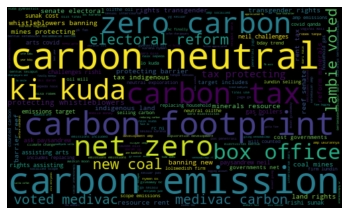

In [67]:
#Vusualizations Plot World Cloud
from wordcloud import WordCloud
allwords = ' '.join( [twts for twts in df['original_text']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21 , max_font_size = 119).generate(allwords)

plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [69]:
#Function to compute negative, neutral and positive analysis
def Getanalysis(p):
  if p< 0:
    return 'Negative'
  elif p==0:
    return 'Neutral'
  else:
    return 'Positive'


df['scoremap'] = df['Polarity'].apply(Getanalysis)
df



,original_text,Subjectivity,Polarity,scoremap
0,giving forth life is becoming a burden in keny...,0.530556,0.319444,Positive
1,teenmaar panja gabbarsingh khaleja kuda ...,0.000000,0.000000,Neutral
2,rei chintu lo vachina ad nizam ne lo kottaru...,0.000000,0.000000,Neutral
3,today is world day to combat desertification a...,0.650000,0.250000,Positive
4,hearing greghunt say hes confident vaccines wi...,0.833333,0.500000,Positive
...,...,...,...,...
5616,lambie has voted against medivac carbon tax pr...,0.454545,0.136364,Positive
5617,idhi me bathuku most records in nizam from ...,0.500000,0.500000,Positive
5618,welkin moon giveaway bc i finally have moneyu ...,0.600000,0.123333,Positive
5619,manam edi chesina daaniki kuda elevation istad...,0.000000,0.000000,Neutral


In [80]:
# Print all of the positive tweets
j = 1
sortedDf = df.sort_values(by=['Polarity'])
for i in range(0,sortedDf.shape[0]):
  if (sortedDf['scoremap'][i]=='Positive'):
     print(str(j) + ') '+sortedDf['original_text'][i])
     print()
     j = j+1

Streaming output truncated to the last 5000 lines.
283) mr arthur ssekankya regional supervisor digital ugequitybank takes ugandas top mobile money dealers through security features of eazzybiz an online solution that enables you to manage your business finances from wherever you are equityugfloatfinancing 

284)  people own england’s largest carbon store  the peat beneath this country’s huge grouse moor estates so i’m delighted to have allegedly become a factor in investment decisions about grouse moors 😂 if you own one please restore the peat amp rewild it 

285) inorder to qualify for better  mobile money loans your previous transactions availed by the telecommunication company and your bank account transactions are used as a basis to allocate the loan limit that fits youequityugfloatfinancing 

286)  mediaworkshop 🌍paolo ruti chief scientist eumetsatfrom monitoring to action 👉climate change👉new record in  on carbon dioxyd 💀 httpstcocqlwjmpugc

287) welkin moon giveaway bc i finally

In [84]:
# Print the negative tweets
j = 1 
sortedDF = df.sort_values(by = ['Polarity'],ascending = 'False')
for i in range(0 , sortedDF.shape[0]):
  if (sortedDF['scoremap'][i] ==  'Negative'):
    print(str(j) + ') '+ sortedDF['original_text'][i])
    print()
    j=j+1


1) lolswedish firm lundin is selling carbon neutral oilthe oil will be counted as carbon neutral from exploration development amp socalled scope  amp  emissions but…emissions caused by the oils final use or scope  emissions are not included 

2)  profstrachan ecowarriorss christinemilne  mzjacobson  bsuhic njdoc ddelich elderjodi devindthorpe amazingchevvolt enricomolinari  climateguyw paulhbeckwith stopadanicairns sustmeme leahstokes debraruh  armanwalker  hanslak  klinkmi sethleitman breezylovininwv geraldkutney  kirillklip blanketcrap antonboym alexharteco smoothsale thenergynet suemarietta lehimesa joesegal gretathunberg treacl   golwgymor joseyrider lahautj  solarstoragecheapest electricity eversome utilities want u  finance failing deadly coalkindly rtenergytransition climateaction cleanenergyrenewableenergy endcoal carbonclimatecrisis fridaysforfuture sdgssustainergya 

3) kicking off our fis fintech founder feature series is oaknorths  rishi khoslalearn about khosla and learn h

In [15]:
cleanTweet['polarity'].value_counts()

0.0                     2134
0.5                      340
-0.1                     252
0.13636363636363635      200
0.15416666666666667      144
                        ... 
0.08                       2
0.4666666666666666         2
0.10500000000000001        2
-0.05000000000000001       2
polarity                   1
Name: polarity, Length: 246, dtype: int64

In [16]:
cleanTweet['polarity'].replace({'polarity':np.nan}, inplace=True)

In [17]:
cleanTweet['polarity'].isnull().sum()

1

In [18]:
cleanTweet = cleanTweet.dropna()

In [19]:
cleanTweet['polarity'] = cleanTweet['polarity'].astype(float)

In [20]:
cleanTweet['scoremap'] = cleanTweet['polarity']

negative = cleanTweet[cleanTweet['scoremap'] < 0].index
neutral = cleanTweet[cleanTweet['scoremap'] == 0].index
positive = cleanTweet[cleanTweet['scoremap'] > 0].index

cleanTweet.loc[negative, 'scoremap'] = 'negative'
cleanTweet.loc[neutral, 'scoremap'] = 'neutral'
cleanTweet.loc[positive, 'scoremap'] = 'positive'

cleanTweet['scoremap'].value_counts()

positive    2648
neutral     2130
negative     838
Name: scoremap, dtype: int64

In [21]:
cleanTweet.head()

,clean_text,polarity,scoremap
0,Giving forth life becoming burden Kenya This m...,0.319444,positive
1,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,0.000000,neutral
2,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,0.000000,neutral
3,Today World Day Combat Restoring degraded land...,0.250000,positive
4,Hearing say 's confident vaccines delivered li...,0.500000,positive


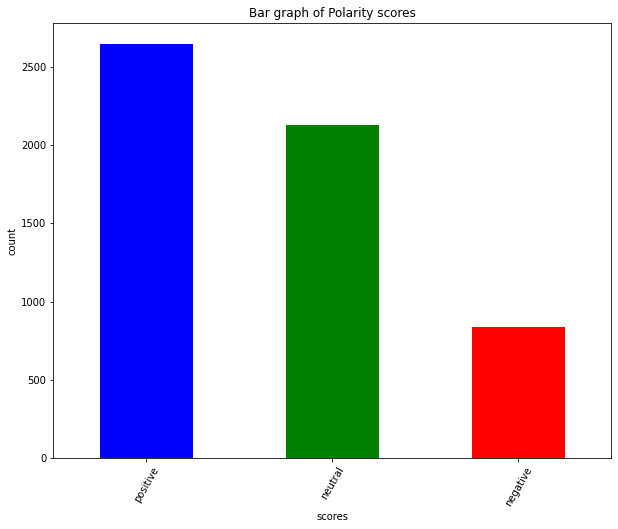

In [22]:
colors = ['blue', 'green','red']

plt.figure(figsize=(10,8))
cleanTweet['scoremap'].value_counts().plot(kind='bar', rot = 60, color= colors)
plt.title('Bar graph of Polarity scores')
plt.xlabel('scores')
plt.ylabel('count');

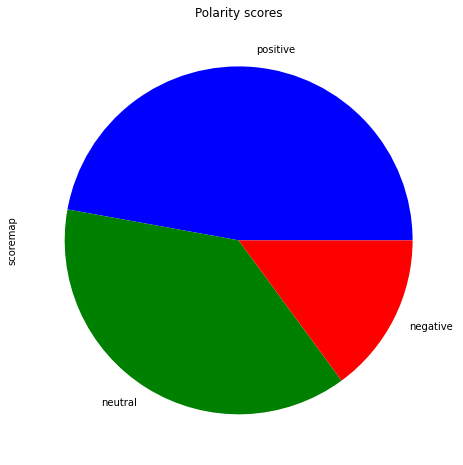

In [23]:
plt.figure(figsize=(10,8))
labels = ['positive', 'neutral','negative']
cleanTweet['scoremap'].value_counts().plot(kind='pie',labels=labels, colors = colors)
plt.title('Polarity scores');

In [24]:
# def text_category(p): 
#   if p>0:
#     polar= 'positive'
#   elif p<0:
#     polar = 'negative'
#   else:
#     polar= 'neutral'
#   return polar
# poler = cleanTweet.iloc[:,0]
# for p in poler:
#   text_category(float(p))
# cleanTweet.head()

In [25]:
score_code = {'positive': 1, 'negative': 0}
cleanTweet['scoremap'] = cleanTweet['scoremap'].map(score_code)
cleanTweet = cleanTweet.dropna()
cleanTweet.head()

,clean_text,polarity,scoremap
0,Giving forth life becoming burden Kenya This m...,0.319444,1.0
3,Today World Day Combat Restoring degraded land...,0.250000,1.0
4,Hearing say 's confident vaccines delivered li...,0.500000,1.0
6,Today World Day Combat Restoring degraded land...,0.250000,1.0
9,Austria `` right '' grid tariffs regulatory re...,0.285714,1.0


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


X = cleanTweet[['clean_text']]
y = cleanTweet[['scoremap']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)


# model = SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None)
# model_fit = model.fit(X_train,y_train)
# model_fit
count_vect.vocabulary_.get(u'algorithm')


from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)


tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(1, 1)